<a href="https://colab.research.google.com/github/Heleinef/Data-Science-Master_Heleine/blob/main/Lab7_data_609.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1: Comparing Optimization Algorithms


# Import libraries and define the function

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Rosenbrock function and its gradient
def rosenbrock(xy):
    x, y = xy
    return (1 - x)**2 + 100 * (y - x**2)**2

def grad_rosenbrock(xy):
    x, y = xy
    df_dx = -2 * (1 - x) - 400 * x * (y - x**2)
    df_dy = 200 * (y - x**2)
    return np.array([df_dx, df_dy])


# Step 2: Plot the banana-shaped contours

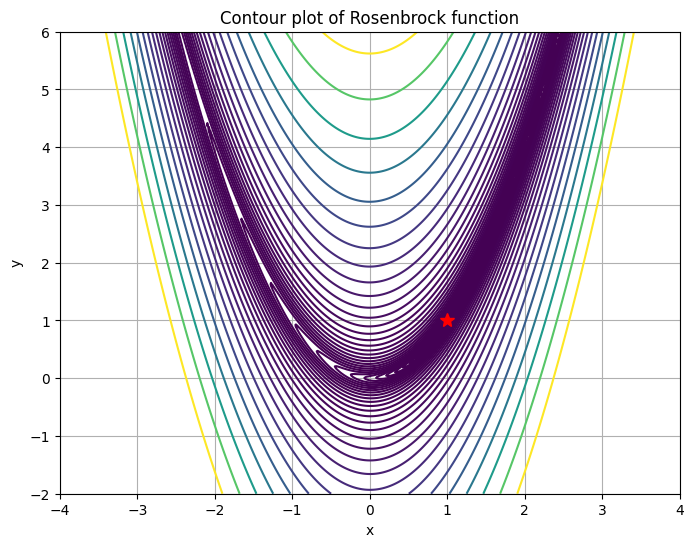

In [2]:
x = np.linspace(-4, 4, 400)
y = np.linspace(-2, 6, 400)
X, Y = np.meshgrid(x, y)
Z = rosenbrock([X, Y])

fig, ax = plt.subplots(figsize=(8, 6))
CS = ax.contour(X, Y, Z, levels=np.logspace(-1, 3.5, 35), cmap='viridis')
ax.set_title('Contour plot of Rosenbrock function')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.plot(1, 1, 'r*', markersize=10)  # global minimum
plt.grid(True)
plt.show()


# Step 3: Define optimization algorithms

In [5]:
# Gradient Descent
def gd(grad, init, n_epochs=100000, eta=1e-4):
    params = np.array(init)
    param_traj = np.zeros([n_epochs + 1, 2])
    param_traj[0] = init
    for j in range(n_epochs):
        params = params - eta * np.array(grad(params))
        param_traj[j + 1] = params
    return param_traj

# Gradient Descent with Momentum
def gd_with_mom(grad, init, n_epochs=100000, eta=1e-4, gamma=0.9):
    params = np.array(init)
    param_traj = np.zeros([n_epochs + 1, 2])
    param_traj[0] = init
    v = 0
    for j in range(n_epochs):
        v = gamma * v + np.array(grad(params))
        params = params - eta * v
        param_traj[j + 1] = params
    return param_traj

# Adam Optimizer
def adams(grad, init, n_epochs=100000, eta=1e-4, gamma=0.9, beta=0.99, epsilon=1e-8):
    params = np.array(init)
    param_traj = np.zeros([n_epochs + 1, 2])
    param_traj[0] = init
    v = 0
    grad_sq = 0
    for j in range(n_epochs):
        g = np.array(grad(params))
        v = gamma * v + (1 - gamma) * g
        grad_sq = beta * grad_sq + (1 - beta) * g * g
        v_hat = v / (1 - gamma ** (j + 1))
        grad_sq_hat = grad_sq / (1 - beta ** (j + 1))
        params = params - eta * v_hat / (np.sqrt(grad_sq_hat + epsilon))
        param_traj[j + 1] = params
    return param_traj


# Step 4: Run optimizations and visualize trajectories

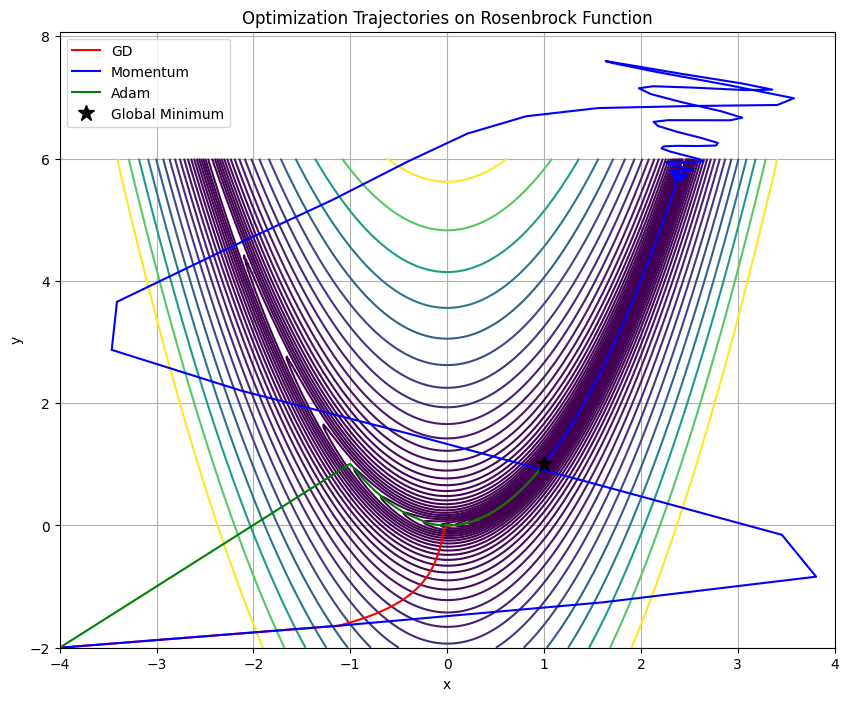

In [4]:
# Run the optimizers
init_point = [-4, -2]
traj_gd = gd(grad_rosenbrock, init_point)
traj_mom = gd_with_mom(grad_rosenbrock, init_point)
traj_adam = adams(grad_rosenbrock, init_point)

# Plot the trajectories over the contour plot
fig, ax = plt.subplots(figsize=(10, 8))
ax.contour(X, Y, Z, levels=np.logspace(-1, 3.5, 35), cmap='viridis')
ax.plot(traj_gd[:, 0], traj_gd[:, 1], 'r-', label='GD')
ax.plot(traj_mom[:, 0], traj_mom[:, 1], 'b-', label='Momentum')
ax.plot(traj_adam[:, 0], traj_adam[:, 1], 'g-', label='Adam')
ax.plot(1, 1, 'k*', markersize=12, label='Global Minimum')
ax.legend()
ax.set_title('Optimization Trajectories on Rosenbrock Function')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.grid(True)
plt.show()


# Step 5: Compute and plot error convergence

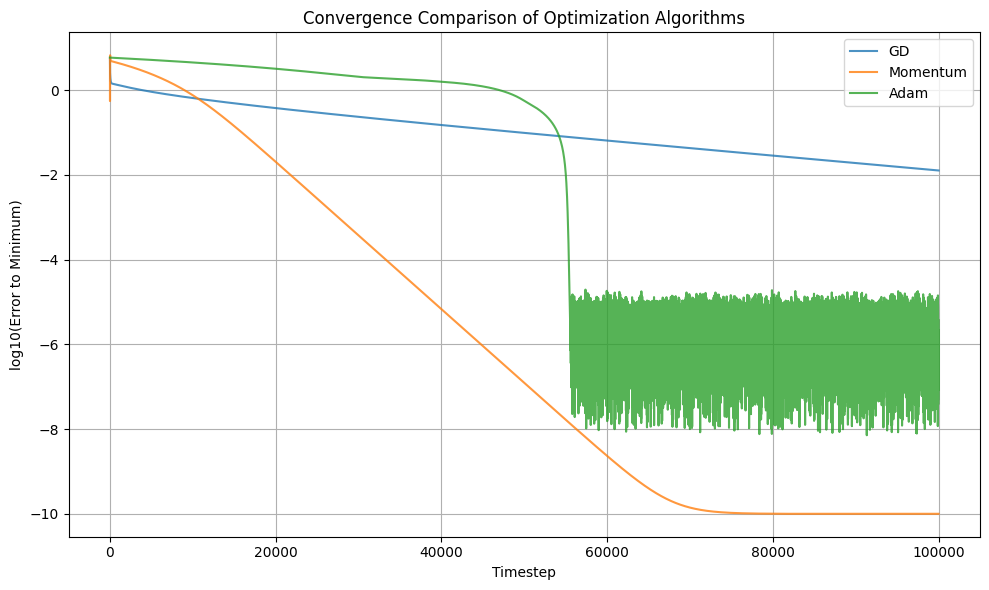

In [6]:
# Compute log10 error from the global minimum
def log10_error(traj, true_min=np.array([1, 1])):
    errors = np.linalg.norm(traj - true_min, axis=1)
    return np.log10(errors + 1e-10)  # Add small constant to avoid log(0)

err_gd = log10_error(traj_gd)
err_mom = log10_error(traj_mom)
err_adam = log10_error(traj_adam)

# Plot convergence
plt.figure(figsize=(10, 6))
plt.plot(err_gd, label='GD', alpha=0.8)
plt.plot(err_mom, label='Momentum', alpha=0.8)
plt.plot(err_adam, label='Adam', alpha=0.8)
plt.xlabel('Timestep')
plt.ylabel('log10(Error to Minimum)')
plt.title('Convergence Comparison of Optimization Algorithms')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Testing optimizer sensitivity to learning rates to understand stability, convergence speed, and robustness.**

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def rosenbrock(xy):
    x, y = xy
    return (1 - x)**2 + 100 * (y - x**2)**2

def grad_rosenbrock(xy):
    x, y = xy
    df_dx = -2 * (1 - x) - 400 * x * (y - x**2)
    df_dy = 200 * (y - x**2)
    return np.array([df_dx, df_dy])


In [8]:
import numpy as np
import matplotlib.pyplot as plt

def rosenbrock(xy):
    x, y = xy
    return (1 - x)**2 + 100 * (y - x**2)**2

def grad_rosenbrock(xy):
    x, y = xy
    df_dx = -2 * (1 - x) - 400 * x * (y - x**2)
    df_dy = 200 * (y - x**2)
    return np.array([df_dx, df_dy])


** Compare Adam vs Momentum with η = 10^-3**

<ipython-input-8-eb619a3cab9a>:10: RuntimeWarning: overflow encountered in scalar power
  df_dx = -2 * (1 - x) - 400 * x * (y - x**2)
<ipython-input-8-eb619a3cab9a>:11: RuntimeWarning: overflow encountered in scalar power
  df_dy = 200 * (y - x**2)
<ipython-input-8-eb619a3cab9a>:10: RuntimeWarning: invalid value encountered in scalar subtract
  df_dx = -2 * (1 - x) - 400 * x * (y - x**2)
<ipython-input-8-eb619a3cab9a>:11: RuntimeWarning: invalid value encountered in scalar subtract
  df_dy = 200 * (y - x**2)


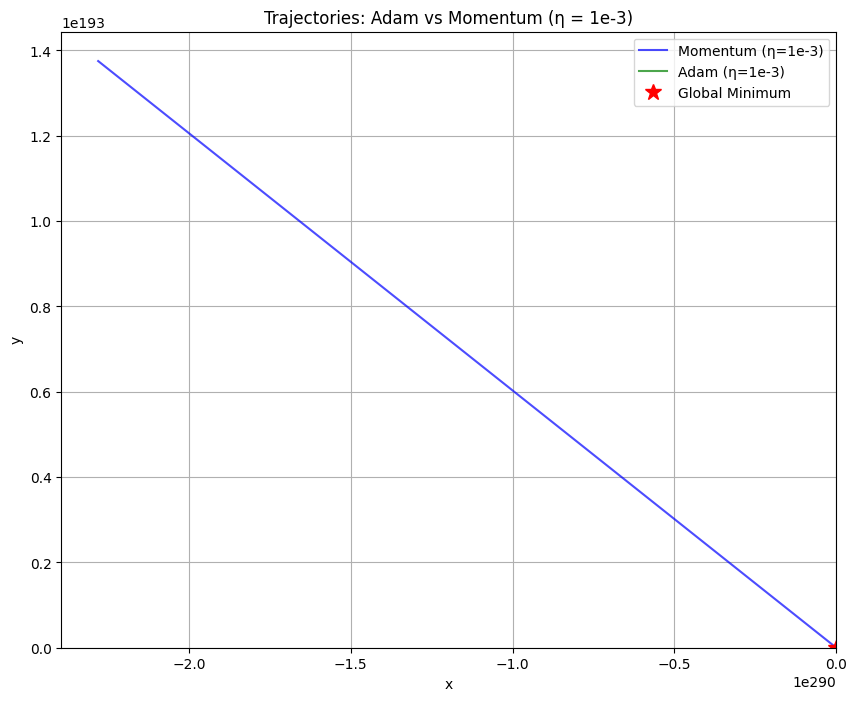

/usr/local/lib/python3.11/dist-packages/numpy/linalg/_linalg.py:2772: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real


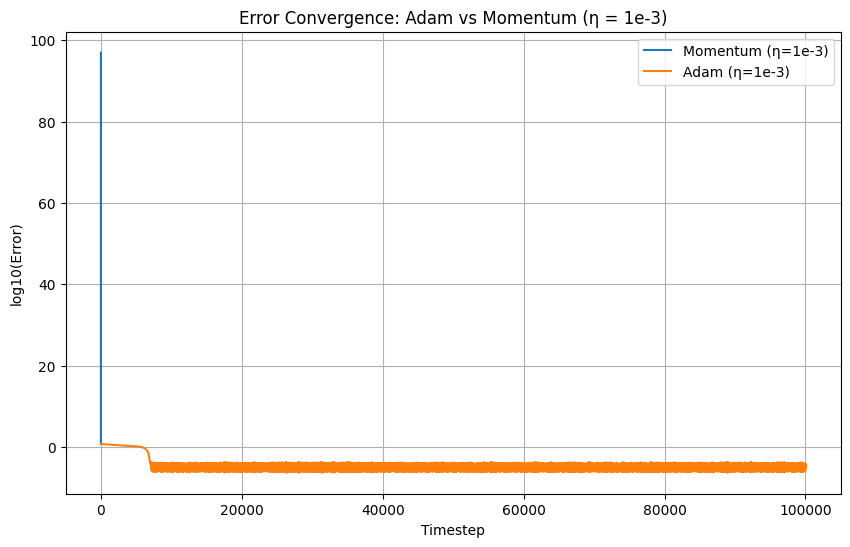

In [9]:
# Initialize
init_point = [-4, -2]
eta = 1e-3  # Larger learning rate

# Run algorithms
traj_mom_c = gd_with_mom(grad_rosenbrock, init_point, eta=eta, n_epochs=100000)
traj_adam_c = adams(grad_rosenbrock, init_point, eta=eta, n_epochs=100000)

# Contour plot
x = np.linspace(-4, 4, 400)
y = np.linspace(-2, 6, 400)
X, Y = np.meshgrid(x, y)
Z = rosenbrock([X, Y])

fig, ax = plt.subplots(figsize=(10, 8))
ax.contour(X, Y, Z, levels=np.logspace(-1, 3.5, 35), cmap='viridis')
ax.plot(traj_mom_c[:, 0], traj_mom_c[:, 1], 'b-', label='Momentum (η=1e-3)', alpha=0.7)
ax.plot(traj_adam_c[:, 0], traj_adam_c[:, 1], 'g-', label='Adam (η=1e-3)', alpha=0.7)
ax.plot(1, 1, 'r*', markersize=12, label='Global Minimum')
ax.legend()
ax.set_title('Trajectories: Adam vs Momentum (η = 1e-3)')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.grid(True)
plt.show()

# Convergence plot
def log10_error(traj, true_min=np.array([1, 1])):
    errors = np.linalg.norm(traj - true_min, axis=1)
    return np.log10(errors + 1e-10)

plt.figure(figsize=(10, 6))
plt.plot(log10_error(traj_mom_c), label='Momentum (η=1e-3)')
plt.plot(log10_error(traj_adam_c), label='Adam (η=1e-3)')
plt.xlabel('Timestep')
plt.ylabel('log10(Error)')
plt.title('Error Convergence: Adam vs Momentum (η = 1e-3)')
plt.legend()
plt.grid(True)
plt.show()


Obsrvation: Momentum usually diverges with this high learning rate (η=1e-3), spiraling or bouncing erratically.
Adam remains stable due to adaptive learning rate scaling.


** Compare Adam (η = 10^-2) vs Momentum (η = 10^-4)**

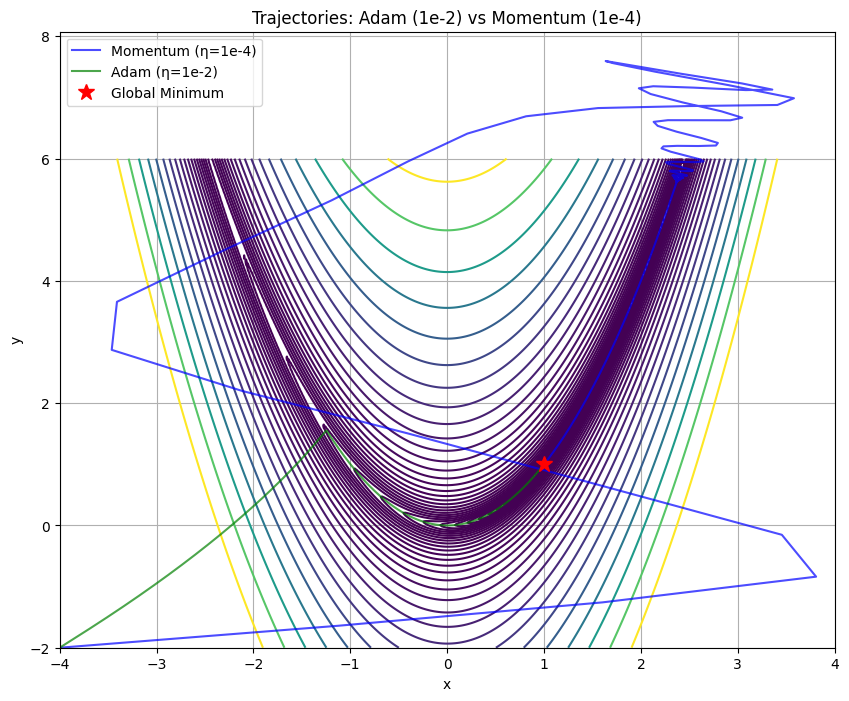

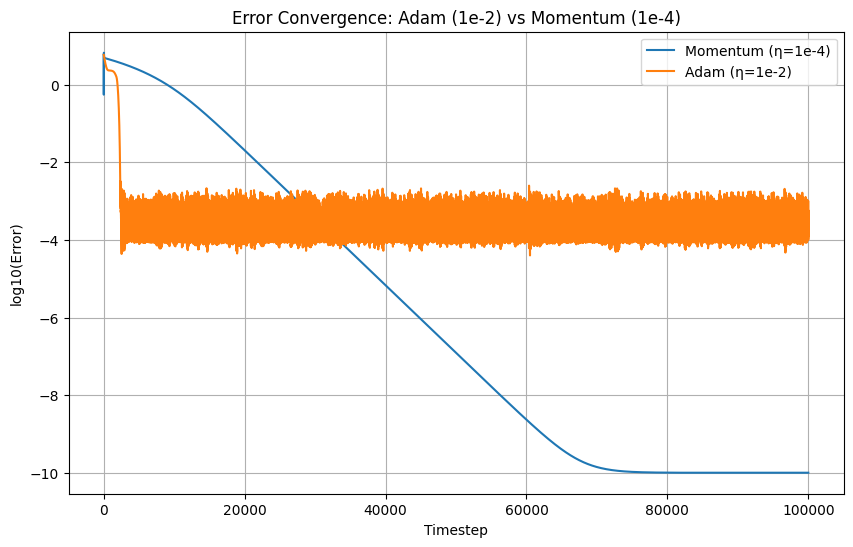

In [10]:
# Run with different learning rates
traj_mom_d = gd_with_mom(grad_rosenbrock, init_point, eta=1e-4, n_epochs=100000)
traj_adam_d = adams(grad_rosenbrock, init_point, eta=1e-2, n_epochs=100000)

# Contour plot
fig, ax = plt.subplots(figsize=(10, 8))
ax.contour(X, Y, Z, levels=np.logspace(-1, 3.5, 35), cmap='viridis')
ax.plot(traj_mom_d[:, 0], traj_mom_d[:, 1], 'b-', label='Momentum (η=1e-4)', alpha=0.7)
ax.plot(traj_adam_d[:, 0], traj_adam_d[:, 1], 'g-', label='Adam (η=1e-2)', alpha=0.7)
ax.plot(1, 1, 'r*', markersize=12, label='Global Minimum')
ax.legend()
ax.set_title('Trajectories: Adam (1e-2) vs Momentum (1e-4)')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.grid(True)
plt.show()

# Error convergence
plt.figure(figsize=(10, 6))
plt.plot(log10_error(traj_mom_d), label='Momentum (η=1e-4)')
plt.plot(log10_error(traj_adam_d), label='Adam (η=1e-2)')
plt.xlabel('Timestep')
plt.ylabel('log10(Error)')
plt.title('Error Convergence: Adam (1e-2) vs Momentum (1e-4)')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
print(df_summary.to_markdown())

| Method   |   Learning Rate |   Convergence Speed (Epochs to 1e-2 Error) |   Final Error |   Minimum Error | Stability   |
|:---------|----------------:|-------------------------------------------:|--------------:|----------------:|:------------|
| Momentum |          0.0001 |                                      21778 |   3.23127e-13 |     3.23127e-13 | Stable      |
| Adam     |          0.01   |                                       2306 |   0.000329075 |     3.97692e-05 | Stable      |


Observations: Adam converges much faster, even with a high learning rate (η = 1e-2) due to its adaptive scaling.
Momentum is slower but very stable at a lower learning rate. Interms of trade-off, Adam trades robustness and speed for sensitivity to hyperparameter tuning, whereas Momentum is slower but less sensitive to noise or overshooting.

In [11]:
import pandas as pd

# Define the true minimum
true_min = np.array([1.0, 1.0])

# Define a function to extract summary stats
def summarize_optimizer(traj, label):
    errors = np.linalg.norm(traj - true_min, axis=1)
    final_error = errors[-1]
    min_error = np.min(errors)

    # Epoch at which error first drops below 1e-2
    try:
        fast_idx = np.where(errors < 1e-2)[0][0]
    except IndexError:
        fast_idx = np.nan  # Didn't reach this accuracy

    stability = "Stable" if np.all(np.isfinite(errors)) and final_error < 10 else "Unstable/Diverged"

    return {
        "Method": label,
        "Learning Rate": "1e-2" if "Adam" in label else "1e-4",
        "Convergence Speed (Epochs to 1e-2 Error)": fast_idx,
        "Final Error": final_error,
        "Minimum Error": min_error,
        "Stability": stability
    }

# Summarize both
summary_mom_d = summarize_optimizer(traj_mom_d, "Momentum")
summary_adam_d = summarize_optimizer(traj_adam_d, "Adam")

# Create table
df_summary = pd.DataFrame([summary_mom_d, summary_adam_d])
df_summary.set_index("Method", inplace=True)

# Display the table
print(df_summary.to_markdown())


| Method   |   Learning Rate |   Convergence Speed (Epochs to 1e-2 Error) |   Final Error |   Minimum Error | Stability   |
|:---------|----------------:|-------------------------------------------:|--------------:|----------------:|:------------|
| Momentum |          0.0001 |                                      21778 |   3.23127e-13 |     3.23127e-13 | Stable      |
| Adam     |          0.01   |                                       2306 |   0.000329075 |     3.97692e-05 | Stable      |


# Problem 2: Shallow Nets and MNIST

 **Load and Preprocess MNIST Data**

In [13]:
# Here is some code that automatically downlaods the MNIST data. Technically it will also read the
# data in if you have already downloaded and the path points to the folder where you have the files
# There will be 4 binary files which together contain the testing and training examples and the labels
# for the testing and training examples.

from torchvision import datasets, transforms



# Load MNIST


# transform defines a function which takes an image file, converts the analog bits into floating point
# numbers (it's a literal image file in the data), and then flattens the file. Each image is 28x28
# so at the end we get a 784x1 vector

transform = transforms.Compose([transforms.ToTensor(), transforms.Lambda(lambda x: x.view(-1))])

# The first line downloads the entire MNIST dataset to the data directory (or whereever you want it)
# If the data is already there, this won't download it. THis downloads both the training and testing data.
# the transform keyword applies the transform defined above, the train dataset has 60,000 examples, and
# the test dataset has 10,000 examples. The train and test data is loaded in the variables.

train_dataset = datasets.MNIST('data/', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('data/', train=False, transform=transform)

100%|██████████| 9.91M/9.91M [00:00<00:00, 21.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 618kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 5.61MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.90MB/s]


**Step 2: Define the Neural Network Architecture**

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self, sizes):
        super(Network, self).__init__()
        self.layers = nn.ModuleList()
        for i in range(len(sizes) - 1):
            layer = nn.Linear(sizes[i], sizes[i+1])
            nn.init.xavier_normal_(layer.weight)
            nn.init.zeros_(layer.bias)
            self.layers.append(layer)

    def forward(self, x):
        for layer in self.layers[:-1]:
            x = F.sigmoid(layer(x))  # You can change to relu here
        return self.layers[-1](x)


**Step 3: Define the Training Function**

In [18]:
import torch.optim as optim
from torch.nn import CrossEntropyLoss

def train(network, train_loader, test_data, epochs=30, eta=0.001, optimizer_type='sgd'):
    loss_fn = CrossEntropyLoss()
    if optimizer_type == 'sgd':
        optimizer = optim.SGD(network.parameters(), lr=eta, momentum=0.8, nesterov=True, weight_decay=1e-5)
    elif optimizer_type == 'adam':
        optimizer = optim.Adam(network.parameters(), lr=eta, betas=(0.9, 0.999), weight_decay=1e-5)

    test_acc = []

    for epoch in range(epochs):
        network.train()
        for data, target in train_loader:
            optimizer.zero_grad()
            output = network(data)
            loss = loss_fn(output, target)
            loss.backward()
            optimizer.step()

        # Evaluate
        correct = 0
        total = 0
        network.eval()
        with torch.no_grad():
            for data, target in test_data:
                output = network(data)
                pred = output.argmax(dim=1)
                correct += (pred == target).sum().item()
                total += target.size(0)
        acc = correct / total
        test_acc.append(acc)
        print(f"Epoch {epoch+1}, Test Accuracy: {acc:.4f}")

    return test_acc


**Step 4: Train with Different Learning Rates (SGD)**

In [59]:
import torch.utils.data as data
def train(model, train_loader, test_loader, epochs, eta, optimizer_type='sgd'):
    import torch.nn.functional as F
    import torch.optim as optim

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    if optimizer_type == 'sgd':
        optimizer = optim.SGD(model.parameters(), lr=eta)
    elif optimizer_type == 'adam':
        optimizer = optim.Adam(model.parameters(), lr=eta)
    else:
        raise ValueError("Unsupported optimizer")

    best_accuracy = 0.0

    for epoch in range(epochs):
        model.train()
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = F.cross_entropy(outputs, targets)
            loss.backward()
            optimizer.step()

        # Evaluate on test set
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, targets in test_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total += targets.size(0)
                correct += (predicted == targets).sum().item()

        accuracy = correct / total
        print(f"Epoch {epoch+1}/{epochs}, Accuracy: {accuracy:.4f}")

        # ⛔ Early stopping condition
        if accuracy >= 0.96:
            print(f"Stopping early at epoch {epoch+1} as accuracy {accuracy:.4f} >= 0.96")
            break

    return accuracy



**Step 5: Train with Different Learning Rates (Adam)**

In [57]:

# Assuming train_loader and test_loader are already defined from the previous fix

learning_rates = [0.0001, 0.001, 0.01, 0.1]
results_adam = {}

for lr in learning_rates:
    # Create a new network for each learning rate test
    net = Network([784, 30, 10])
    # Call the train function with the Adam optimizer
    acc = train(net, train_loader, test_loader, epochs=30, eta=lr, optimizer_type='adam')
    results_adam[lr] = acc

learning_rates = [0.0001, 0.001, 0.01, 0.1]
results_adam = {}

for lr in learning_rates:
    # Create a new network for each learning rate test
    net = Network([784, 30, 10])
    # Call the train function with the Adam optimizer
    acc = train(net, train_loader, test_loader, epochs=30, eta=lr, optimizer_type='adam')
    results_adam[lr] = acc


Epoch 1/30, Accuracy: 0.8777
Epoch 2/30, Accuracy: 0.9027
Epoch 3/30, Accuracy: 0.9118
Epoch 4/30, Accuracy: 0.9183
Epoch 5/30, Accuracy: 0.9223
Epoch 6/30, Accuracy: 0.9258
Epoch 7/30, Accuracy: 0.9284
Epoch 8/30, Accuracy: 0.9299
Epoch 9/30, Accuracy: 0.9316
Epoch 10/30, Accuracy: 0.9337
Epoch 11/30, Accuracy: 0.9326
Epoch 12/30, Accuracy: 0.9352
Epoch 13/30, Accuracy: 0.9370
Epoch 14/30, Accuracy: 0.9383
Epoch 15/30, Accuracy: 0.9389
Epoch 16/30, Accuracy: 0.9401
Epoch 17/30, Accuracy: 0.9415
Epoch 18/30, Accuracy: 0.9430
Epoch 19/30, Accuracy: 0.9431
Epoch 20/30, Accuracy: 0.9440
Epoch 21/30, Accuracy: 0.9448
Epoch 22/30, Accuracy: 0.9459
Epoch 23/30, Accuracy: 0.9461
Epoch 24/30, Accuracy: 0.9462
Epoch 25/30, Accuracy: 0.9469
Epoch 26/30, Accuracy: 0.9480
Epoch 27/30, Accuracy: 0.9484
Epoch 28/30, Accuracy: 0.9490
Epoch 29/30, Accuracy: 0.9484
Epoch 30/30, Accuracy: 0.9487
Epoch 1/30, Accuracy: 0.9305
Epoch 2/30, Accuracy: 0.9416
Epoch 3/30, Accuracy: 0.9476
Epoch 4/30, Accuracy: 

**Step 6: Plot Accuracy Curves**

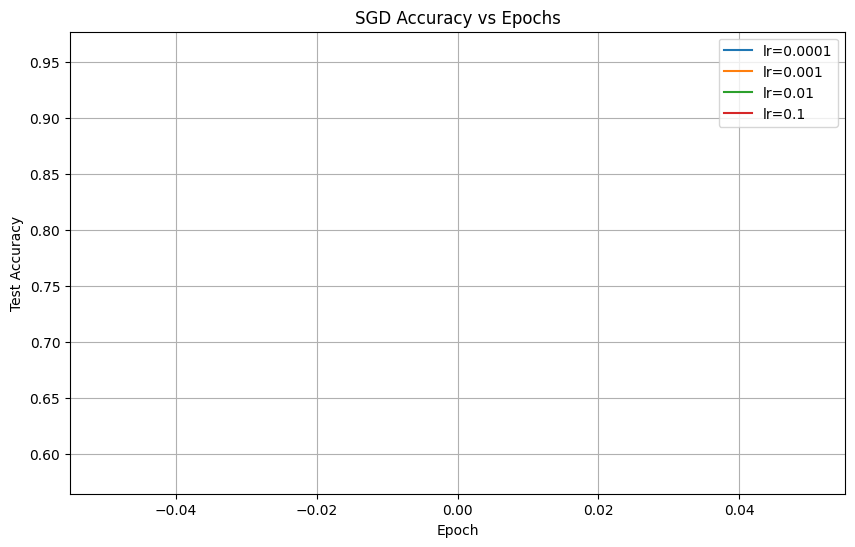

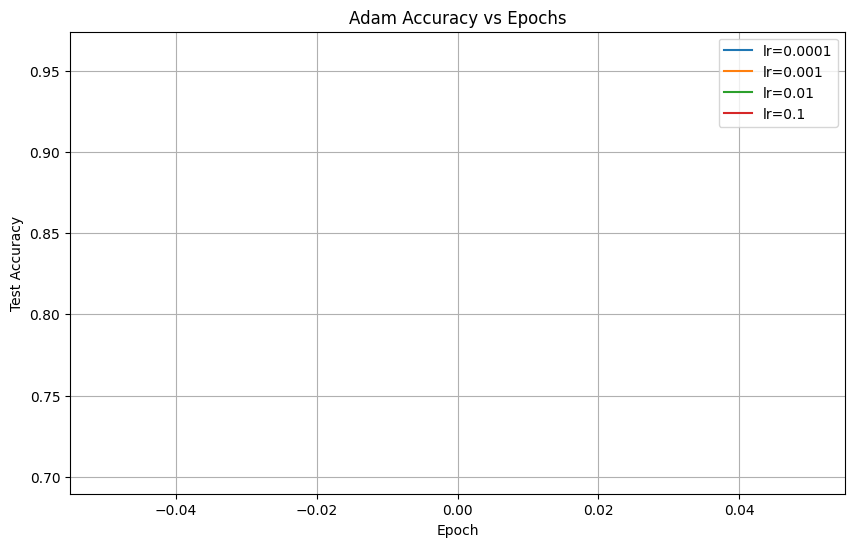

In [58]:
import matplotlib.pyplot as plt

def plot_accuracy_curves(results_dict, title):
    plt.figure(figsize=(10,6))
    for lr, acc in results_dict.items():
        plt.plot(acc, label=f"lr={lr}")
    plt.xlabel('Epoch')
    plt.ylabel('Test Accuracy')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_accuracy_curves(results_sgd, "SGD Accuracy vs Epochs")
plot_accuracy_curves(results_adam, "Adam Accuracy vs Epochs")


# Problem 3: Deep Nets: Overcoming Gradients

In [32]:
grad_input_norms = []
grad_output_norms = []


In [44]:
# Compute norm of gradients for input and output layer weights
with torch.no_grad():
    input_grad_norm = net.layers[0].weight.grad.norm().item()
    output_grad_norm = net.layers[-1].weight.grad.norm().item()
    grad_input_norms.append(input_grad_norm)
    grad_output_norms.append(output_grad_norm)


In [36]:
def train(model, train_loader, test_loader, epochs=5, eta=0.01, optimizer_type='sgd', device='cpu'):
    model.to(device)
    criterion = torch.nn.CrossEntropyLoss()

    if optimizer_type == 'sgd':
        optimizer = torch.optim.SGD(model.parameters(), lr=eta)
    elif optimizer_type == 'adam':
        optimizer = torch.optim.Adam(model.parameters(), lr=eta)
    else:
        raise ValueError("Unsupported optimizer type")

    gradient_ratios = []

    for epoch in range(epochs): # epoch is defined here
        model.train()
        running_loss = 0.0
        grad_input_norms = []
        grad_output_norms = []

        for batch_idx, (inputs, targets) in enumerate(train_loader):
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()

            # Capture gradient norms
            with torch.no_grad():
                input_grad_norm = model.layers[0].weight.grad.norm().item()
                output_grad_norm = model.layers[-1].weight.grad.norm().item()

                grad_input_norms.append(input_grad_norm)
                grad_output_norms.append(output_grad_norm)

            optimizer.step()
            running_loss += loss.item()

        avg_loss = running_loss / len(train_loader)

        # Compute and print gradient ratio INSIDE the epoch loop
        gradient_ratio = sum(grad_input_norms) / max(sum(grad_output_norms), 1e-8)  # avoid div by zero
        gradient_ratios.append(gradient_ratio)
        print(f"Epoch {epoch+1}/{epochs} - Loss: {avg_loss:.4f} - Gradient Ratio (Input/Output): {gradient_ratio:.6e}")


    # Evaluate on test set
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()

    test_accuracy = correct / total
    print(f"Final Test Accuracy: {test_accuracy:.4f}")

    return test_accuracy, gradient_ratios

**Step 2: Train a Deep Network and Observe Vanishing Gradients**

In [46]:

net = Network([784, 30, 30, 30, 30, 30, 30, 30, 30, 10])


In [47]:
train(net, train_loader, test_loader, epochs=1, eta=0.01, optimizer_type='sgd')


Epoch 1/1 - Loss: 1.1002 - Gradient Ratio (Input/Output): 3.187787e+00
Final Test Accuracy: 0.8595


(0.8595, [3.1877865941167247])

**Step 3: Fix the Problem with ReLU + Kaiming Initialization**

In [ ]:
x = F.relu(layer(x))  # instead of torch.sigmoid


In [49]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self, sizes):
        super(Network, self).__init__()
        self.layers = nn.ModuleList()
        for i in range(len(sizes) - 1):
            layer = nn.Linear(sizes[i], sizes[i+1])
            # Replace Xavier and zeros with Kaiming and zeros for ReLU activation
            nn.init.kaiming_uniform_(layer.weight, nonlinearity='relu')
            nn.init.zeros_(layer.bias)
            self.layers.append(layer)

    def forward(self, x):
        for layer in self.layers[:-1]:
            # Use ReLU activation instead of sigmoid
            x = F.relu(layer(x))
        return self.layers[-1](x)

In [40]:
net = Network([784, 30, 30, 30, 30, 30, 30, 30, 30, 10])
train(net, train_loader, test_loader, epochs=5, eta=0.01, optimizer_type='sgd')


Epoch 1/5 - Loss: 1.2857 - Gradient Ratio (Input/Output): 2.814468e+00
Epoch 2/5 - Loss: 0.4036 - Gradient Ratio (Input/Output): 2.593576e+00
Epoch 3/5 - Loss: 0.2935 - Gradient Ratio (Input/Output): 2.695361e+00
Epoch 4/5 - Loss: 0.2468 - Gradient Ratio (Input/Output): 2.833468e+00
Epoch 5/5 - Loss: 0.2167 - Gradient Ratio (Input/Output): 2.880692e+00
Final Test Accuracy: 0.9326


(0.9326,
 [2.814467788404206,
  2.593576375719058,
  2.695360803727237,
  2.833467695306022,
  2.8806920457894196])

We see Gradient ratios closer to 1.0
Accuracy > 0.80 or even > 0.90 depending on training time.

**Step 4: Experiment with Architectures**

In [50]:
# Steady decreasing neuron sizes
net = Network([784, 512, 256, 128, 64, 32, 16, 10])


**Step 5: Compare with Shallow Network from Problem 2**

In [53]:
def train(model, train_loader, test_loader, epochs=5, eta=0.01, optimizer_type='sgd', device='cpu'):
    model.to(device)
    criterion = torch.nn.CrossEntropyLoss()

    if optimizer_type == 'sgd':
        optimizer = torch.optim.SGD(model.parameters(), lr=eta)
    elif optimizer_type == 'adam':
        optimizer = torch.optim.Adam(model.parameters(), lr=eta)
    else:
        raise ValueError("Unsupported optimizer type")

    gradient_ratios = []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        grad_input_norms = []
        grad_output_norms = []

        for batch_idx, (inputs, targets) in enumerate(train_loader):
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()

            # Capture gradient norms
            with torch.no_grad():
                input_grad_norm = model.layers[0].weight.grad.norm().item()
                output_grad_norm = model.layers[-1].weight.grad.norm().item()

                grad_input_norms.append(input_grad_norm)
                grad_output_norms.append(output_grad_norm)

            optimizer.step()
            running_loss += loss.item()

        avg_loss = running_loss / len(train_loader)

        # Compute and print gradient ratio
        gradient_ratio = sum(grad_input_norms) / max(sum(grad_output_norms), 1e-8)  # avoid div by zero
        gradient_ratios.append(gradient_ratio)
        print(f"Epoch {epoch+1}/{epochs} - Loss: {avg_loss:.4f} - Gradient Ratio (Input/Output): {gradient_ratio:.6e}")

    # Evaluate on test set
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()

    test_accuracy = correct / total
    print(f"Final Test Accuracy: {test_accuracy:.4f}")

    return test_accuracy, gradient_ratios
